<a href="https://colab.research.google.com/github/Grajes-pl/dw_matrix_road_sign/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import  to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_3/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_3/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/train.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

In [5]:
len(np.unique(y_train))

43

In [0]:
# if aby ta kategoryzacja nie wykonała się kilka razy jakby ktoś tę komórkę odpalił wieceij niż raz

if y_train.ndim ==1: y_train = to_categorical(y_train)
if y_test.ndim ==1: y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape ),

    Flatten(),

    Dense(num_classes, activation='softmax'),  
])

def train_model(get_model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  model.fit(
      X_train, 
      y_train,
      batch_size= params_fit.get('batch_size', 128),
      epochs= params_fit.get('epochs', 5),
      verbose= params_fit.get('verbose', 1),
      validation_data = params_fit.get('validation_data', (X_train, y_train)),
      callbacks= [tensorboard_callback]
  )
  return model

In [12]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 5s 18ms/step - loss: 30.0670 - accuracy: 0.7394 - val_loss: 0.1986 - val_accuracy: 0.9535
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1975 - accuracy: 0.9547 - val_loss: 0.1251 - val_accuracy: 0.9690
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1265 - accuracy: 0.9715 - val_loss: 0.0807 - val_accuracy: 0.9810
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1111 - accuracy: 0.9747 - val_loss: 0.0711 - val_accuracy: 0.9822
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1337 - accuracy: 0.9724 - val_loss: 0.0881 - val_accuracy: 0.9841


In [13]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob

array([[2.22541152e-16, 2.58497206e-08, 5.75532422e-09, ...,
        5.72974955e-07, 9.95907903e-01, 2.62128356e-06],
       [3.73255100e-16, 5.95598104e-09, 1.03747176e-11, ...,
        6.48983756e-10, 3.35435793e-02, 7.92850334e-12],
       [1.62146776e-16, 3.85856841e-12, 9.47026854e-13, ...,
        1.33095657e-09, 8.74336362e-01, 2.31937408e-12],
       ...,
       [0.00000000e+00, 8.14850717e-24, 2.23024413e-33, ...,
        8.03036568e-28, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.03744259e-22, 1.13353126e-26, ...,
        1.32467523e-35, 1.87086415e-29, 0.00000000e+00],
       [0.00000000e+00, 3.45796114e-18, 9.40762852e-28, ...,
        2.82334146e-24, 7.44332608e-35, 0.00000000e+00]], dtype=float32)

In [0]:
df = pd.read_csv('data/signnames.csv')
# Słownik
labels_dict = df.to_dict()['b']

In [29]:
y_pred_prob[500]

array([1.22902827e-35, 6.23243297e-12, 3.80476748e-21, 1.14855689e-33,
       1.44331168e-36, 1.26552116e-17, 1.25631328e-27, 1.31907097e-38,
       4.80783765e-38, 0.00000000e+00, 3.58209950e-27, 5.57338599e-14,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.33616842e-17, 1.67065949e-14,
       2.92274217e-28, 4.48266890e-09, 4.01383272e-32, 7.25325195e-21,
       5.72799401e-22, 6.14709902e-20, 6.73511135e-28, 2.16609391e-24,
       6.43220354e-14, 1.91937315e-26, 4.46276447e-17, 1.00000000e+00,
       0.00000000e+00, 8.35714255e-28, 4.60132606e-37, 0.00000000e+00,
       2.69182153e-32, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.43984167e-38, 0.00000000e+00], dtype=float32)

<BarContainer object of 43 artists>

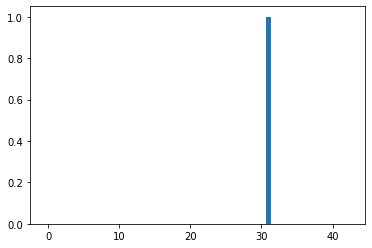

In [31]:
plt.bar(range(43), y_pred_prob[500] )

In [28]:
np.argmax(y_pred_prob[500])

31

In [30]:
labels_dict[np.argmax(y_pred_prob[500])]

'Wild animals crossing'

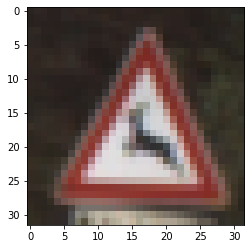

In [27]:
plt.imshow(X_test[500])

In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):

  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

In [40]:
predict(model_trained, X_test, y_test)

0.984137475214805

## Architecture ing

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

In [43]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape ),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),  
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),  
])



train_and_predict( get_cnn_v2(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1004 - accuracy: 0.9832 - val_loss: 0.0598 - val_accuracy: 0.9887
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0837 - accuracy: 0.9864 - val_loss: 0.0395 - val_accuracy: 0.9926
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0672 - accuracy: 0.9892 - val_loss: 0.0268 - val_accuracy: 0.9942
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0844 - accuracy: 0.9864 - val_loss: 0.0595 - val_accuracy: 0.9890
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0814 - accuracy: 0.9865 - val_loss: 0.0726 - val_accuracy: 0.9918


0.9917813730279605

In [44]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape ),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),  
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),  
])



train_and_predict( get_cnn_v3(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0787 - accuracy: 0.9877 - val_loss: 0.0381 - val_accuracy: 0.9933
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0968 - accuracy: 0.9867 - val_loss: 0.0475 - val_accuracy: 0.9927
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0352 - accuracy: 0.9938 - val_loss: 0.0317 - val_accuracy: 0.9954
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0251 - accuracy: 0.9947 - val_loss: 0.0349 - val_accuracy: 0.9964
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0451 - accuracy: 0.9930 - val_loss: 0.0217 - val_accuracy: 0.9959


0.9959481594298687

In [47]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape ),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),  
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),  
])

#get_cnn_v4(input_shape, num_classes).summary()

train_and_predict( get_cnn_v4(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0561 - accuracy: 0.9920 - val_loss: 0.0638 - val_accuracy: 0.9930
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0482 - accuracy: 0.9933 - val_loss: 0.0920 - val_accuracy: 0.9885
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0732 - accuracy: 0.9894 - val_loss: 0.0888 - val_accuracy: 0.9882
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0676 - accuracy: 0.9921 - val_loss: 0.0570 - val_accuracy: 0.9922
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0767 - accuracy: 0.9907 - val_loss: 0.0255 - val_accuracy: 0.9956


0.9956033219345384

In [48]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape ),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),  
    Dropout(0.3),

    Dense(1024, activation='relu'),  
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),  
])


train_and_predict( get_cnn_v5(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0580 - accuracy: 0.9925 - val_loss: 0.1071 - val_accuracy: 0.9891
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0499 - accuracy: 0.9936 - val_loss: 0.0066 - val_accuracy: 0.9990
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0232 - accuracy: 0.9962 - val_loss: 0.0153 - val_accuracy: 0.9973
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1054 - accuracy: 0.9898 - val_loss: 0.0628 - val_accuracy: 0.9934
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.0722 - accuracy: 0.9914 - val_loss: 0.0171 - val_accuracy: 0.9977


0.9977298198224087

In [49]:
# RGB
X_train[0].shape

(32, 32, 3)

In [50]:
# Szare
color.rgb2gray(X_train[0]).shape

(32, 32)

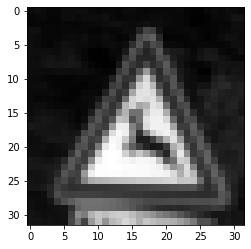

In [52]:
plt.imshow(color.rgb2gray(X_train[500]), cmap=plt.get_cmap('gray'))

In [0]:
# -1 aby nie liczyć samemu 
X_train_gray = color.rgb2gray(X_train).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray(X_test).reshape(-1, 32, 32, 1)

In [59]:
model = get_cnn_v5((32, 32, 1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 6s 24ms/step - loss: 2.3323 - accuracy: 0.3308 - val_loss: 0.7308 - val_accuracy: 0.7568
Epoch 2/5
272/272 [==============================] - 6s 22ms/step - loss: 0.6223 - accuracy: 0.7963 - val_loss: 0.1907 - val_accuracy: 0.9405
Epoch 3/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2827 - accuracy: 0.9100 - val_loss: 0.0756 - val_accuracy: 0.9780
Epoch 4/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1788 - accuracy: 0.9437 - val_loss: 0.0462 - val_accuracy: 0.9876
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1331 - accuracy: 0.9586 - val_loss: 0.0291 - val_accuracy: 0.9924


0.9924135751027329